In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import h5py
import numpy as np
file_name = "/content/drive/MyDrive/hdf5/outdoor_day/outdoor_day1_data.hdf5"

f = h5py.File(file_name, "r")
for key in f.keys():
    print(key) #Names of the groups in HDF5 file.

davis
velodyne
visensor


In [4]:
#Get the HDF5 group
group = f['davis']

#Checkout what keys are inside that group.
for key in group.keys():
    print(key)

left
right


In [5]:
subgroup = group['left']
required = subgroup['events']

In [6]:
x = []
y = []
t = []
p = []
for i in required[:1000]:
    x.append(i[0])
    y.append(i[1])
    t.append(i[2])
    p.append(i[3])

In [7]:
x = np.asarray(x)
y = np.asarray(y)
t = np.asarray(t)
p = np.asarray(p)

In [8]:
len(x), len(y), len(t), len(p)

(1000, 1000, 1000, 1000)

In [9]:
np.save('x_1000',x)
np.save('y_1000',y)
np.save('t_1000',t)
np.save('p_1000',p)

In [10]:
np.save('event_5000',np.asarray(required[4000:5000]))

In [12]:
event = np.load('/content/drive/MyDrive/MVSEC data/events/event_1000.npy')

In [13]:
event

array([[ 1.4300000e+02,  5.4000000e+01,  1.5061179e+09,  1.0000000e+00],
       [ 3.0000000e+00,  1.2900000e+02,  1.5061179e+09, -1.0000000e+00],
       [ 1.0600000e+02,  5.3000000e+01,  1.5061179e+09,  1.0000000e+00],
       ...,
       [ 3.3800000e+02,  2.2100000e+02,  1.5061179e+09,  1.0000000e+00],
       [ 2.2900000e+02,  1.8400000e+02,  1.5061179e+09,  1.0000000e+00],
       [ 1.2000000e+02,  2.0500000e+02,  1.5061179e+09,  1.0000000e+00]])

84.0 163.0 1506117897.3817575 1.0
249.0 246.0 1506117897.3386674 1.0
45.0 34.0 1506117897.3715634 1.0
67.0 124.0 1506117897.4291666 1.0
40.0 210.0 1506117897.2218544 1.0
150.0 60.0 1506117897.3814425 1.0
257.0 158.0 1506117897.2897274 1.0
146.0 73.0 1506117897.3918524 1.0
Initial
 [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
184.69975636150687
184.69975636150687
184.69975636150687
184.69975636150687
184.69975636150687
184.69975636150687
184.69975636150687
184.69975636150687
134.7664646712972
134.7664646712972
134.7664646712972
134.7664646712972
134.7664646712972
134.7664646712972
134.7664646712972
134.7664646712972
42.5440947723653
42.5440947723653
42.5440947723653
42.5440947723653
42.5440947723653
42.5440947723653
42.5440947723653
42.5440947723653
64.38167441127949
64.38167441127949
64.38167441127949
64.38167441127949
64.38167441127949
64.38167441127949
64.38167441127949
64.3816

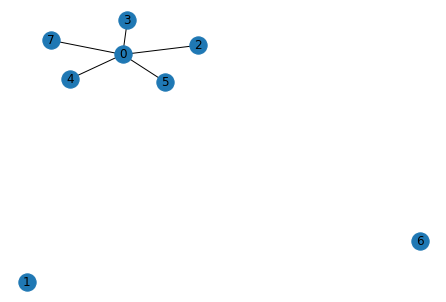

In [15]:
import numpy as np
import math
import scipy.io
import random
import networkx

M = 8
R = 150
class Event:
    def __init__(self, x, y, t, p):
        self.x = x
        self.y = y
        self.t = t
        self.p = p

def isWithin(event1, event2, radius, alpha=1, beta=0.000005):
    x_i = event1.x
    x_j = event2.x
    y_i = event1.y
    y_j = event2.y
    t_i = event1.t/10000
    t_j = event2.t/10000
    spatial = (x_i - x_j)*(x_i - x_j) + (y_i - y_j)*(y_i - y_j)
    temporal = (t_i - t_j)*(t_i - t_j)
    if (alpha * spatial) + (beta * temporal * 100000000) >= 0:
      print(math.sqrt(alpha * spatial + beta * temporal))
      return math.sqrt(alpha * spatial + beta * temporal) <= radius


def main():
    data = np.load('/content/drive/MyDrive/MVSEC data/events/event_1000.npy')  # first 1000 events
    event = []
    for each in data:
        event.append(Event(each[0], each[1], each[2], each[3]))

    # shuffling the list and selecting the first M events i.e., random sampling
    np.random.seed(53)
    np.random.shuffle(event)
    selected_event = event[:M]

    for e in selected_event:
      print(e.x, e.y, e.t, e.p)
    
    adMat = np.zeros([M, M], dtype=int)
    print('Initial\n', adMat)
    for row in range(M):
        for col in adMat[row]:
            if row == col:
                continue 
            if isWithin(selected_event[row], selected_event[col], R):
                adMat[row][col] = 1
                adMat[col][row] = 1
    print('Final\n', adMat)
    G = networkx.from_numpy_matrix(np.array(adMat))
    networkx.draw(G, with_labels=True)
        
if __name__ == "__main__":
    main()